In [2]:
import analysis
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sg
from line_least_cost import llc

%matplotlib inline

/processed


In [3]:
data_path = 'SH_031_04192017_EDITS.txt'

In [11]:
data = pd.read_csv(data_path, sep='\t|,', names=['Time', 'O2', 'CO2'],
                 usecols=['Time', 'O2', 'CO2'], index_col=False)[['Time', 'O2', 'CO2']]
filtered_O2 = analysis.fourier_filter(data.Time, data.O2, 3,100,1.5)
filtered_CO2 = analysis.fourier_filter(data.Time, data.CO2, 3,100,1.5)

/Users/borainbow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


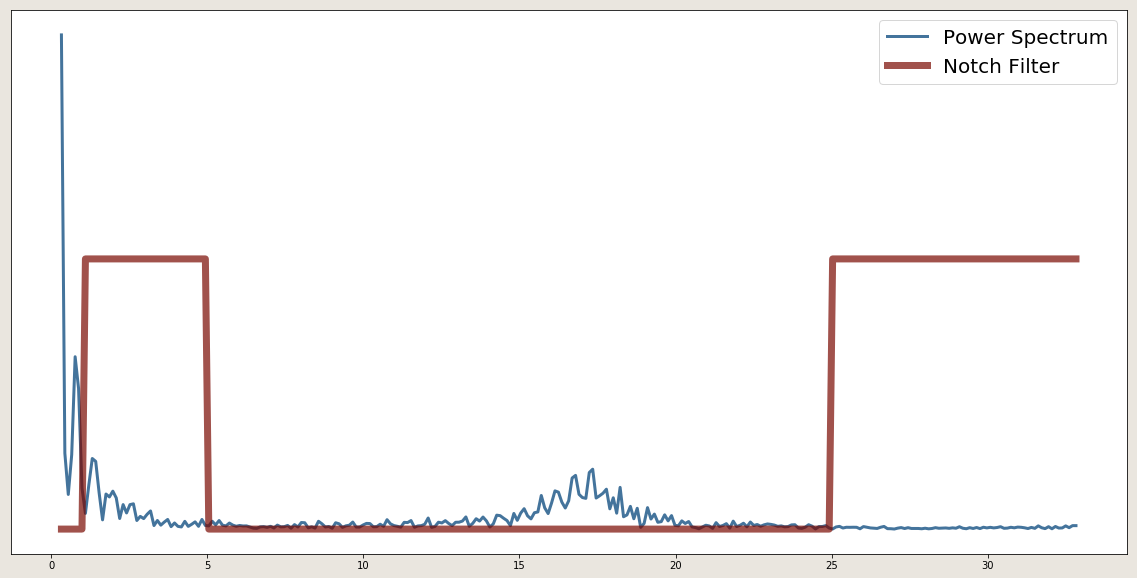

In [12]:
f,_,displayable_O2 = analysis.fourier_trans(data.Time[1], data.O2)

notch = []
for freq in f[3:300]:
    if(freq < 1 or (freq >= 5 and freq <= 25)):
        notch.append(0)
    else:
        notch.append(10)
    

plt.figure(figsize=(20,10), facecolor=(235/256,231/256,224/256,1))
plt.yticks([])
plt.plot(f[3:300], displayable_O2[3:300], linewidth = 3, label = "Power Spectrum", color=(68/256,116/256,157/256,1))
plt.plot(f[3:300], notch, linewidth = 7, label = "Notch Filter", color=(121/256,8/256,0/256,.7))
plt.legend(prop={'size': 20})
plt.savefig("example_ffA.png")


theme_background = (235/256,231/256,224/256,1)
theme_blue = (68/256,116/256,157/256,1)
theme_red = (121/256,8/256,0/256,1)

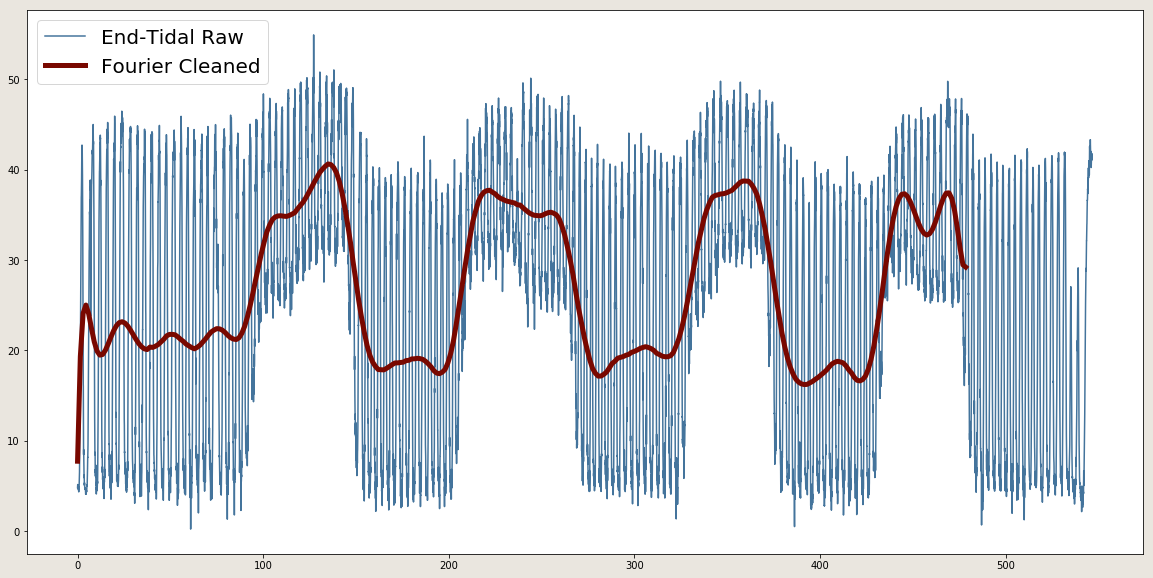

In [24]:
plt.figure(figsize=(20,10), facecolor=theme_background)
plt.plot(data.Time*60, data.CO2, color = theme_blue, label='End-Tidal Raw')
# print(data.Time)
time = np.arange(0,480,1.5)
plt.plot(time, sg.savgol_filter(filtered_CO2, 35,9), color=theme_red, linewidth = 5, label='Fourier Cleaned')
# plt.plot(np.linspace(0,data.Time[len(data.Time)-1], 320),np.loadtxt('/media/labrat/395Mount/replicate_attempt1/SH_024_03292017_EDITS_CO2.contrast'), linewidth = 5)
plt.legend(prop={'size': 20})
plt.savefig("filtered.png")
plt.show()


In [14]:
line_val = llc.descend_onto_line(35, filtered_CO2)

EPOCH :    0


100%|██████████| 100/100 [00:00<00:00, 3054.00it/s]


EPOCH :    1


100%|██████████| 100/100 [00:00<00:00, 2994.63it/s]


EPOCH :    2


100%|██████████| 100/100 [00:00<00:00, 3076.06it/s]


In [8]:
print(line_val)

26.592640612606356


In [9]:
print(llc.get_cost(25, data.CO2.to_numpy()))
print(llc.get_cost(line_val, data.CO2.to_numpy()))

202.74321206847472
203.21657848231268


In [10]:
print(np.average(data.CO2.to_numpy()))

25.647709750321972
